In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Light_conversion/"

fluo_liquide = pd.read_csv(path + "20240229_Fluo_liquide_spectrum" + ".csv", delimiter=";", decimal=".")
PSI_instrument = pd.read_csv(path + "20241029_PSI_instrument" + ".csv", delimiter=";", decimal=".")

def normalize_spectra(spectra):
    spectra_baseline = np.mean(spectra["intensity"][tools.closest_index(spectra["wavelength"], 300):tools.closest_index(spectra["wavelength"], 400)])
    spectra["intensity"] = spectra["intensity"] - spectra_baseline
    spectra["intensity"] = spectra["intensity"] / np.trapz(spectra["intensity"], spectra["wavelength"])
    return spectra

fluo_liquide = normalize_spectra(fluo_liquide)
PSI_instrument = normalize_spectra(PSI_instrument)

In [3]:
path_phaeo = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/UV_vis/20241030_phaeo/"

fig_folder = path_phaeo + "figs/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    
phaeo = pd.read_csv(path_phaeo + "20241030_phaeo" + ".csv", delimiter=";", decimal=".")




In [4]:
phaeo

,wavelength,blank,pt2 - 1000 uL,pt2 - 500 uL,pt2 - 250 uL,pt2 - 100 uL
0,799.987732,0.000349,0.146034,0.082530,0.037619,0.014915
1,799.500610,0.000407,0.146572,0.082817,0.037724,0.015290
2,799.013367,0.000907,0.146585,0.083289,0.037403,0.015328
3,798.491272,0.000395,0.147030,0.082646,0.037448,0.015584
4,798.003845,0.000393,0.146546,0.082925,0.038124,0.015310
...,...,...,...,...,...,...
796,402.014984,0.010277,0.241901,0.121680,0.067641,0.035056
797,401.511719,0.010376,0.241838,0.121833,0.067771,0.035065
798,401.008423,0.010392,0.242181,0.121778,0.067781,0.035124
799,400.505096,0.010496,0.242367,0.121884,0.067916,0.035051


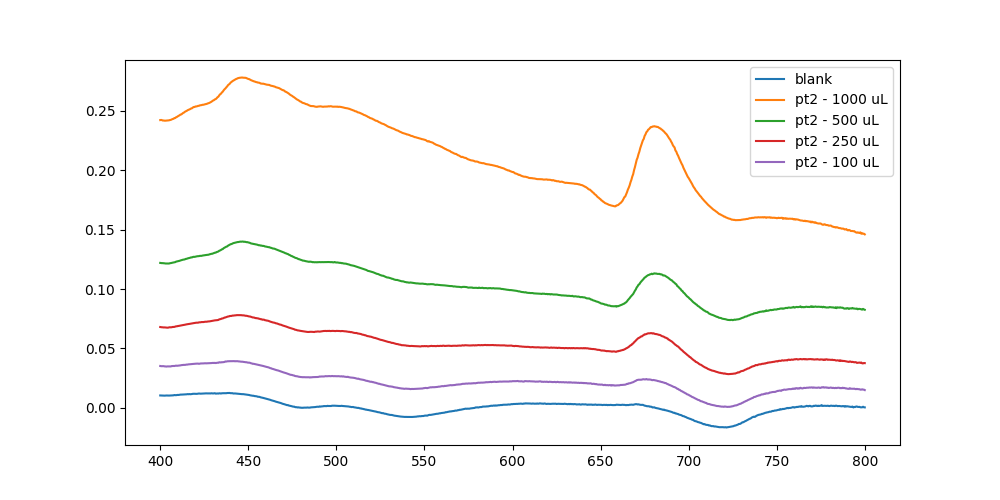

In [5]:
fis, ax = plt.subplots(1, 1, figsize=(10, 5))
for key in phaeo.keys():
    if key != "wavelength":
        ax.plot(phaeo["wavelength"], phaeo[key], label=key)
ax.legend()


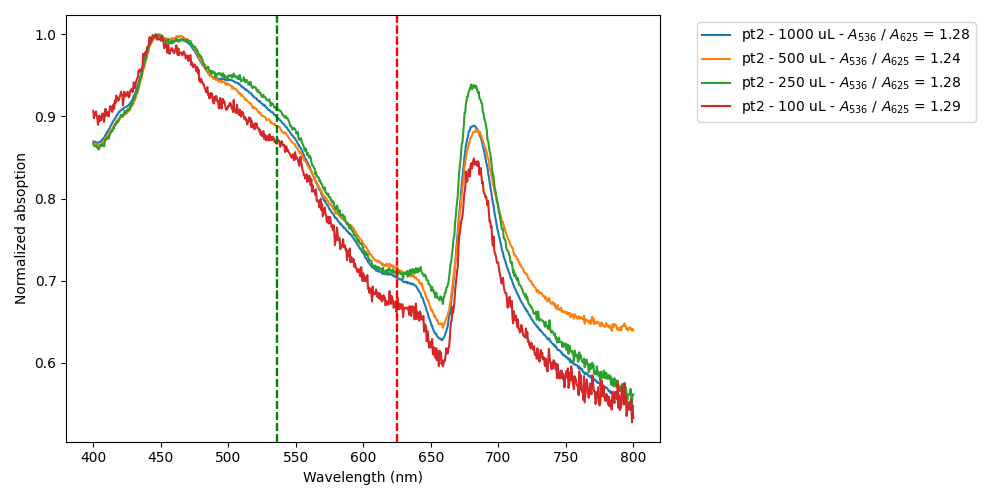

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

i_536 = tools.closest_index(phaeo["wavelength"], 536)
i_625 = tools.closest_index(phaeo["wavelength"], 625)

for key in phaeo.keys():
    if key != "wavelength" and key != "blank":
        y = (phaeo[key] - phaeo["blank"])/max(phaeo[key] - phaeo["blank"])
        ax.plot(phaeo["wavelength"], y, label= f"{key} - $A_{{536}}$ / $A_{{625}}$ = {y[i_536]/y[i_625]:.2f}")
        ax.axvline(536, color="green", linestyle="--")
        ax.axvline(625, color="red", linestyle="--")


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Normalized absoption")

fig.tight_layout()

fig.savefig(fig_folder + "phaeo_absorption.png", dpi=300)


In [8]:
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

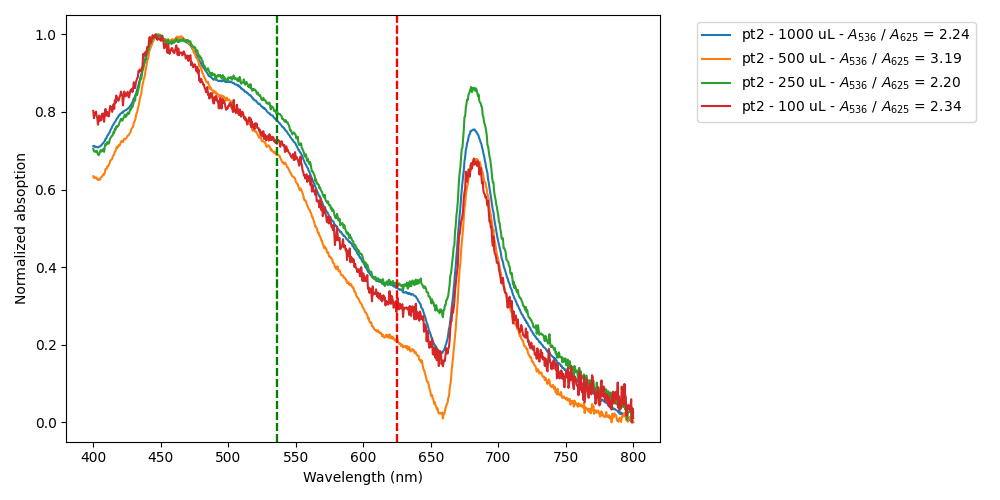

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for key in phaeo.keys():
    if key != "wavelength" and key != "blank":
        normalized_data = normalize(phaeo[key] - phaeo["blank"])
        ax.plot(phaeo["wavelength"], normalized_data, label= f"{key} - $A_{{536}}$ / $A_{{625}}$ = {normalized_data[i_536]/normalized_data[i_625]:.2f}")
        ax.axvline(536, color="green", linestyle="--")
        ax.axvline(625, color="red", linestyle="--")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Normalized absoption")

fig.tight_layout()